# Insonni xarakterini aniqlaydigan project

In [32]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error,classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import plot_tree

In [2]:
import pandas as pd 
df=pd.read_csv('personality_synthetic_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

In [4]:
df.describe()

,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,organization,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.509190,5.454690,5.525955,5.958689,6.014381,5.040063,6.964450,6.483220,5.996018,5.973280,...,5.495280,5.033716,5.940795,5.492490,6.498574,5.508935,6.006893,6.501986,5.516168,5.981982
std,2.468526,2.493731,2.488006,2.162427,2.178551,2.810563,1.647944,1.534911,1.496690,1.697589,...,1.922809,2.203344,2.170924,1.931728,1.889493,1.932081,1.683523,1.889782,1.944257,1.490327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.308044,0.804853,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.590989,3.509578,3.595866,4.382619,4.415537,2.727584,5.812701,5.448486,4.992667,4.805742,...,4.156240,3.429189,4.325104,4.127064,5.157772,4.155375,4.867919,5.160594,4.149764,4.973047
50%,5.540706,5.464038,5.574786,5.972345,6.051489,5.053005,6.989855,6.481365,6.003320,5.986871,...,5.499699,5.045021,5.962857,5.508153,6.528960,5.498701,6.006740,6.525735,5.528102,5.978661
75%,7.424123,7.416314,7.472371,7.598495,7.668598,7.363676,8.155574,7.521483,7.013412,7.142282,...,6.853083,6.656162,7.564929,6.861487,7.885414,6.877156,7.160525,7.878841,6.905844,6.991311
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
df.isnull().sum()

personality_type            0
social_energy               0
alone_time_preference       0
talkativeness               0
deep_reflection             0
group_comfort               0
party_liking                0
listening_skill             0
empathy                     0
creativity                  0
organization                0
leadership                  0
risk_taking                 0
public_speaking_comfort     0
curiosity                   0
routine_preference          0
excitement_seeking          0
friendliness                0
emotional_stability         0
planning                    0
spontaneity                 0
adventurousness             0
reading_habit               0
sports_interest             0
online_social_usage         0
travel_desire               0
gadget_usage                0
work_style_collaborative    0
decision_speed              0
stress_handling             0
dtype: int64

In [6]:
df.nunique()

personality_type                3
social_energy               19254
alone_time_preference       19249
talkativeness               19214
deep_reflection             19374
group_comfort               19345
party_liking                18790
listening_skill             19238
empathy                     19753
creativity                  19917
organization                19804
leadership                  19329
risk_taking                 19711
public_speaking_comfort     19202
curiosity                   19753
routine_preference          19818
excitement_seeking          19199
friendliness                19192
emotional_stability         19922
planning                    19811
spontaneity                 19829
adventurousness             19674
reading_habit               19355
sports_interest             19815
online_social_usage         19323
travel_desire               19782
gadget_usage                19825
work_style_collaborative    19276
decision_speed              19773
stress_handlin

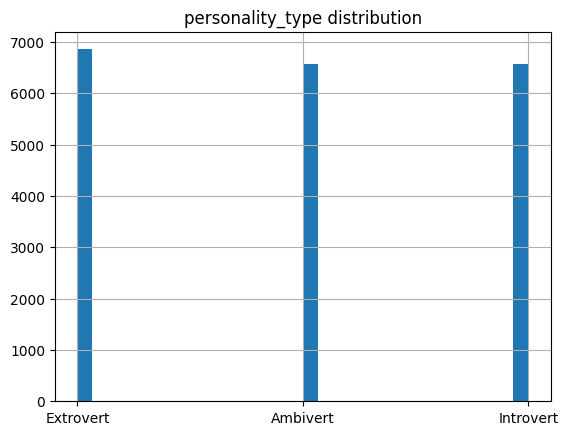

In [7]:
# Target tarqalishi
df['personality_type'].hist(bins=30)
plt.title('personality_type distribution')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

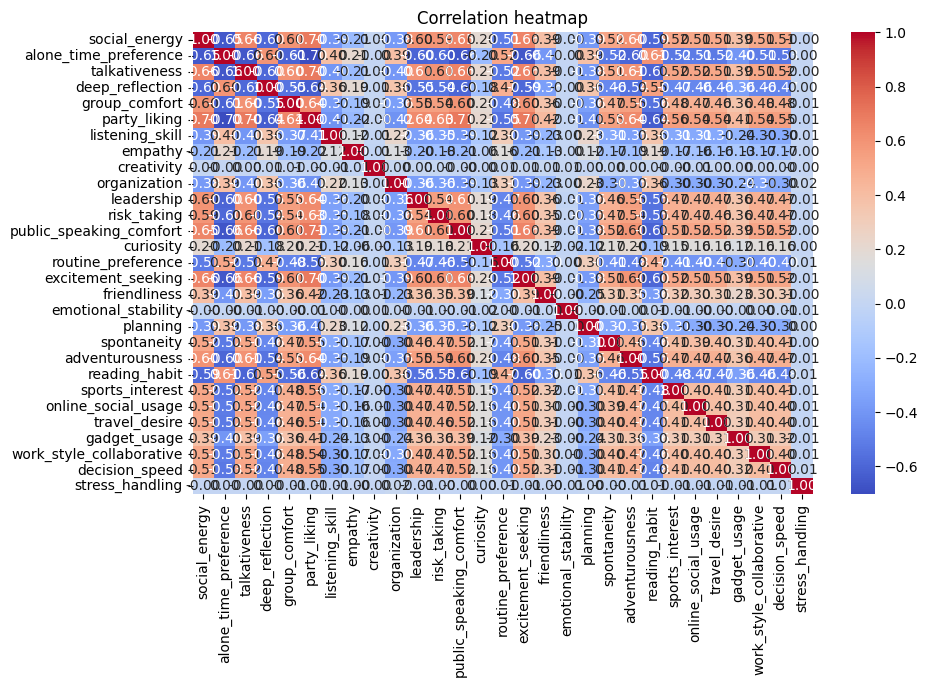

In [9]:
# Korrelatsiya
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

# Preprocessing

In [10]:
# class
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

class Datapreprocessing:
    def __init__(self, df):
        self.df = df.copy()
    
    
    def tozala(self):
        for col in self.df.columns:
            if self.df[col].isnull().any():
                if self.df[col].dtype == 'object':
                    self.df[col].fillna(self.df[col].mode()[0], inplace=True)
                else:
                    self.df[col].fillna(self.df[col].mean(), inplace=True)
        return self
    
    
    def encodla(self):
        encoder = LabelEncoder()
        for col in self.df.columns:
            if self.df[col].dtype == 'object':
                self.df[col] = encoder.fit_transform(self.df[col].astype(str))
        return self
    
    
    def scale_qil(self):
        scaler = MinMaxScaler()
        num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns.drop('xG', errors='ignore')
        self.df[num_cols] = scaler.fit_transform(self.df[num_cols])
        return self

In [11]:
preprocessor = Datapreprocessing(df)

data = (
    preprocessor
    .tozala()
    .encodla()
    .scale_qil()
    .df
)

print(data.head())

   personality_type  social_energy  alone_time_preference  talkativeness  \
0                 1       0.679430               0.385467       0.872545   
1                 0       0.637899               0.573116       0.702953   
2                 0       0.745942               0.632226       0.392227   
3                 1       0.615963               0.309784       0.601909   
4                 2       0.556846               0.698672       0.391324   

   deep_reflection  group_comfort  party_liking  listening_skill   empathy  \
0         0.251515       0.709737      0.858876         0.628944  0.611766   
1         0.727449       0.411120      0.325825         0.488137  0.342934   
2         0.462226       0.534328      0.745215         0.940634  0.578871   
3         0.196544       0.783714      1.000000         0.935197  0.885775   
4         0.992616       0.165048      0.036230         0.708971  0.647296   

   creativity  ...  spontaneity  adventurousness  reading_habit  \
0    0.

In [12]:
df=data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  int32  
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

# Feature Engineering

In [15]:
df.columns

Index(['personality_type', 'social_energy', 'alone_time_preference',
       'talkativeness', 'deep_reflection', 'group_comfort', 'party_liking',
       'listening_skill', 'empathy', 'creativity', 'organization',
       'leadership', 'risk_taking', 'public_speaking_comfort', 'curiosity',
       'routine_preference', 'excitement_seeking', 'friendliness',
       'emotional_stability', 'planning', 'spontaneity', 'adventurousness',
       'reading_habit', 'sports_interest', 'online_social_usage',
       'travel_desire', 'gadget_usage', 'work_style_collaborative',
       'decision_speed', 'stress_handling'],
      dtype='object')

In [16]:
def feature_engineering(df):
    # 1. Social index
    df["social_index"] = df["friendliness"] + df["emotional_stability"]

    # 2. Hobby index
    df["hobby_index"] = df["reading_habit"] + df["sports_interest"]

    # 3. Digital activity
    df["digital_activity"] = df["online_social_usage"] + df["gadget_usage"]

    # 4. Lifestyle balance
    df["lifestyle_balance"] = df["routine_preference"] + df["excitement_seeking"]

    # 5. Work efficiency
    df["work_efficiency"] = df["work_style_collaborative"] + df["decision_speed"]

    # 6. Adventure index
    df["adventure_index"] = df["travel_desire"] + df["adventurousness"]

    return df

In [17]:
df = feature_engineering(df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  int32  
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

# Feature Selection

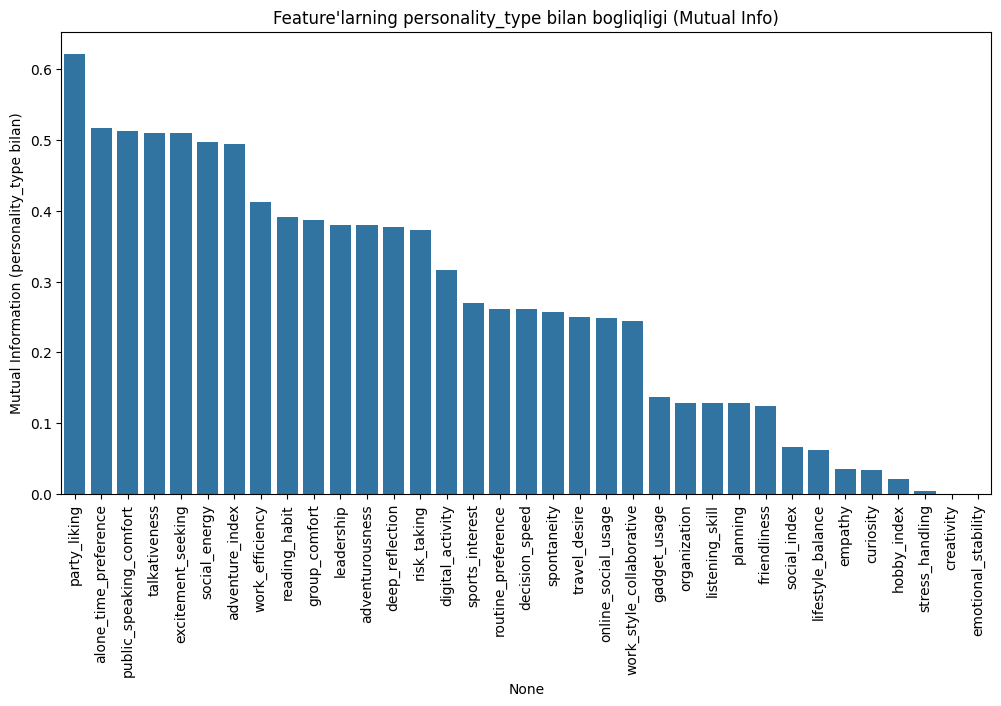

In [20]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Xususiyatlar (featurelar)
x = df.drop(columns=["personality_type"])   # target ustunni olib tashlaymiz

# Target
y = df["personality_type"]

# Inf qiymatlarni NaN ga o'zgartirish
x = x.replace([np.inf, -np.inf], np.nan)

# X va y ni birlashtirib, NaN bo‘lgan satrlarni tashlash
df_clean = pd.concat([x, y], axis=1).dropna()

x_clean = df_clean.drop('personality_type', axis=1)
y_clean = df_clean['personality_type']

# Mutual information hisoblash
mi = mutual_info_regression(x_clean, y_clean, random_state=42)
mi_series = pd.Series(mi, index=x_clean.columns).sort_values(ascending=False)

# Vizualizatsiya
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=mi_series.index, y=mi_series.values)
plt.xticks(rotation=90)
plt.ylabel("Mutual Information (personality_type bilan)")
plt.title("Feature'larning personality_type bilan bogliqligi (Mutual Info)")
plt.show()

 # Shu kod bilan biz:

 # NaN va inf qiymatlarni tozalaymiz

 # Mutual information hisoblaymiz

# Eng predictive feature’larni vizual ko‘ramiz

# Embedded method

In [29]:
# Tree based(Random Forest)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(x, y)
importances = rf.feature_importances_

# Create a DataFrame for feature importance
feat_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Mark top 25% most important features
percentile_threshold = np.percentile(importances, 75)
feat_df['Top25%'] = np.where(feat_df['Importance'] >= percentile_threshold, 'Yes', 'No')

# Show table
print("Random Forest Feature Importance Table:")
print(feat_df)

Random Forest Feature Importance Table:
                     Feature  Importance Top25%
5               party_liking    0.158440    Yes
12   public_speaking_comfort    0.097504    Yes
1      alone_time_preference    0.096993    Yes
15        excitement_seeking    0.094314    Yes
2              talkativeness    0.087596    Yes
0              social_energy    0.082295    Yes
34           adventure_index    0.067128    Yes
33           work_efficiency    0.042994    Yes
4              group_comfort    0.037404    Yes
21             reading_habit    0.037189     No
10                leadership    0.031143     No
11               risk_taking    0.027911     No
3            deep_reflection    0.023919     No
20           adventurousness    0.023832     No
31          digital_activity    0.014740     No
14        routine_preference    0.010810     No
22           sports_interest    0.009238     No
27            decision_speed    0.007636     No
19               spontaneity    0.007106     No


In [31]:
fig = px.bar(
    feat_df,
    x='Feature',
    y='Importance',
    color='Top25%',
    color_discrete_map={'Yes': 'red', 'No': 'blue'},
    text='Importance',
    title='Random Forest Feature Importance'
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600
)

fig.show()

# Training

In [78]:
x=df.drop('personality_type',axis=1)
y=df['personality_type']

In [79]:
# Train-test split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Logistic Regression

In [35]:
log_model=LogisticRegression()

In [36]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred=log_model.predict(x_test)

In [38]:
y_pred

array([0, 1, 2, ..., 2, 0, 0])

In [39]:
score=accuracy_score(y_test,y_pred)

In [40]:
print(f"Logistic Regression aniqligi:{score*100}%ga teng")

Logistic Regression aniqligi:99.85000000000001%ga teng


# Decision Tree

In [43]:
dt_model=DecisionTreeClassifier(max_depth=5)

In [44]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [45]:
y_pred=dt_model.predict(x_test)

In [46]:
score2=accuracy_score(y_test,y_pred)

In [47]:
print(f"Decision Tree aniqligi:{score2*100}%ga teng")

Decision Tree aniqligi:89.7%ga teng


# Random Forest

In [50]:
rf_model=RandomForestClassifier(random_state=42)

In [51]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred=rf_model.predict(x_test)

In [53]:
acc3=accuracy_score(y_test,y_pred)

In [54]:
print(f"Random Forest aniqligi:{acc3*100}%ga teng")

Random Forest aniqligi:99.55000000000001%ga teng


# LightGbm

In [57]:
lgb_model=lgb.LGBMClassifier()

In [58]:
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 35
[LightGBM] [Info] Start training from score -1.102620
[LightGBM] [Info] Start training from score -1.080465
[LightGBM] [Info] Start training from score -1.113028


LGBMClassifier()

In [59]:
y_pred=lgb_model.predict(x_test)

In [61]:
acc4=accuracy_score(y_test,y_pred)

In [62]:
print(f"LightGBM aniqligi:{acc4*100}%ga teng")

LightGBM aniqligi:99.45%ga teng


# XGBoost

In [72]:
xgb_model=xgb.XGBClassifier()

In [73]:
xgb_model=xgb.XGBClassifier()

In [74]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [75]:
y_pred=xgb_model.predict(x_test)

In [76]:
acc5=accuracy_score(y_test,y_pred)

In [77]:
print(f"XGBoost aniqligi:{acc5*100}%ga teng")

XGBoost aniqligi:99.45%ga teng


# GBM

In [81]:
gbm_model=GradientBoostingClassifier()

In [82]:
gbm_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [83]:
y_pred=gbm_model.predict(x_test)

In [84]:
acc6=accuracy_score(y_test,y_pred)

In [85]:
print(f"GBM aniqligi:{acc6*100}%ga teng")

GBM aniqligi:99.55000000000001%ga teng
